In [1]:
# jupyter setup boilerplate
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


from fitting import *

import json
import datetime

from qualang_tools.plot import Fit

import pprint as pp

from plotting_helpers import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load InstrumentManagerWindow
2024-10-30 15:01:36,306 - qm - INFO     - Starting session: 4a2be977-3d72-4c30-bfd8-4ac740b92ebf


### Time Of Flight

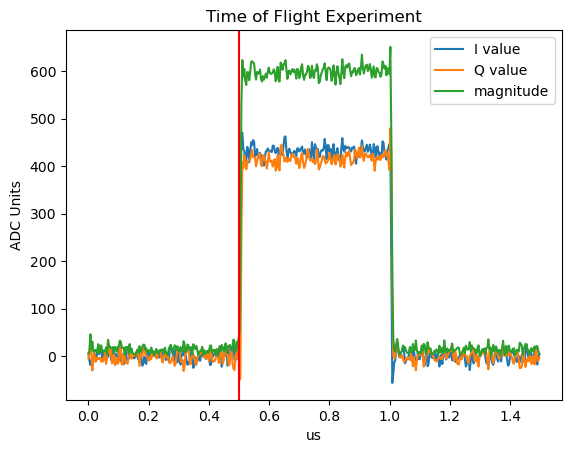

In [80]:
data = r"M:/malab\People\Santi\data\candle_qubit\00000_tof_Q0_2024-10-31.h5"

with SlabFile(data, 'r') as f:
    t = array(f['t'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    config = f.attrs['config']
    config = json.loads(config)

# pp.pprint(config)

# Plot results.
plt.plot(t, I, label="I value")
plt.plot(t, Q, label="Q value")
plt.plot(t, np.abs(I + 1j*Q), label="magnitude")
plt.legend()
plt.ylabel("ADC Units")
plt.xlabel("us");
plt.title('Time of Flight Experiment')
######## SET THIS VALUE AS YOUR config['trig_time'] #########
plt.axvline(0.50, c='r') 

### Resonator Spectroscopy


 data path: M:/malab\People\Santi\data\candle_qubit\00001_res_spec_ge_Q0_2024-10-30.h5
{'f': [7149.327020063338, 0.002149991960037262],
 'fit_func': <function Fit.reflection_resonator_spectroscopy.<locals>.<lambda> at 0x000001843D961B20>,
 'k': [0.3338924123052963, 0.006789714009991585],
 'kc': [2.2557143510529563, 0.0005897645871844697],
 'ki': [-1.92182193874766, 0.0061999494228071154],
 'offset': [882.2053549813487, 70.03393163397345],
 'slope': [-0.1179979653809607, -0.009795529273096043]}


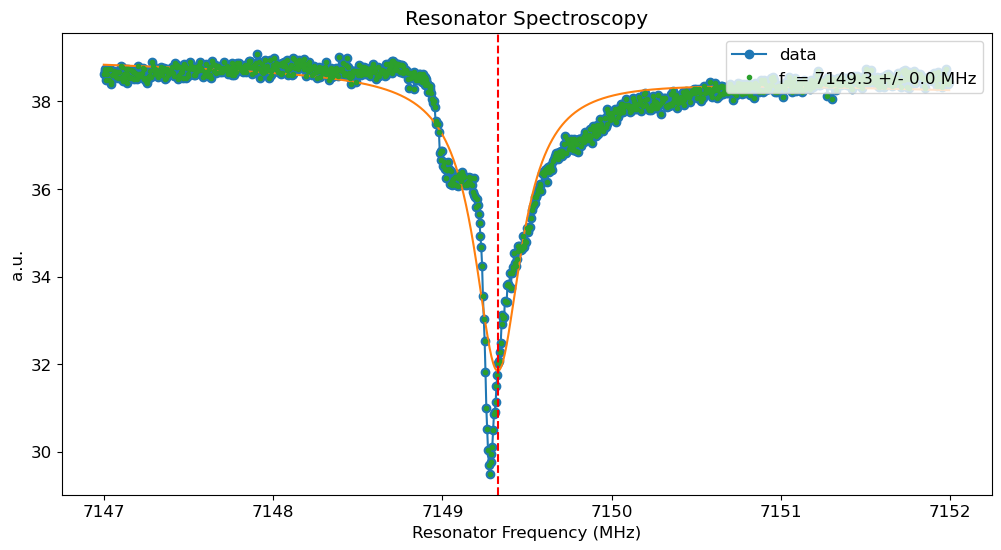

In [652]:
data = r"M:/malab\People\Santi\data\candle_qubit\00001_res_spec_ge_Q0_2024-10-30.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_res_spec_ef_Q5_2024-10-28.h5"

with SlabFile(data, 'r') as f:
    freqs = array(f['fpts'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

# pp.pprint(config)

print('\n data path:', data)
plt.figure(figsize=(12,6))
plt.plot(freqs, amps, marker='o', label = 'data')
# plt.plot(freqs, y_fit, marker='', label = 'Fitted data')
plt.ylabel("a.u.")
plt.xlabel("Resonator Frequency (MHz)")
plt.title('Resonator Spectroscopy')
plt.legend()

fit = Fit()
fit_results = fit.reflection_resonator_spectroscopy(freqs, amps, plot=True)
plt.axvline(fit_results['f'][0], marker='', c='red', linestyle='--')
pp.pprint(fit_results)
plt.show()


#### MUX Resonator Spectrosocpy

{'expts': 500,
 'mixer_freq': 7000,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 10,
 'qubit_ch': [3, 3, 3, 3, 3, 3],
 'qubit_ch_ef': [3, 3, 3, 3, 3, 3],
 'relax_delay': 0.5,
 'reps': 1000,
 'res_ch': [1, 1, 1, 1, 1, 1],
 'res_freq_ef': [7149.44, 0, 0, 0, 0, 0],
 'res_gain_ef': [0.6, 0, 0, 0, 0, 0],
 'res_gain_ge': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
 'res_length': 4.0,
 'res_phase': [0, 0, 0, 0, 0, 0],
 'ro_ch': [1, 1, 1, 1, 1, 1],
 'ro_length': 10.0,
 'start': -2.5,
 'step': 0.01,
 'threshold': [0, 0, 0, 0, 0, 0],
 'trig_time': 0.75}


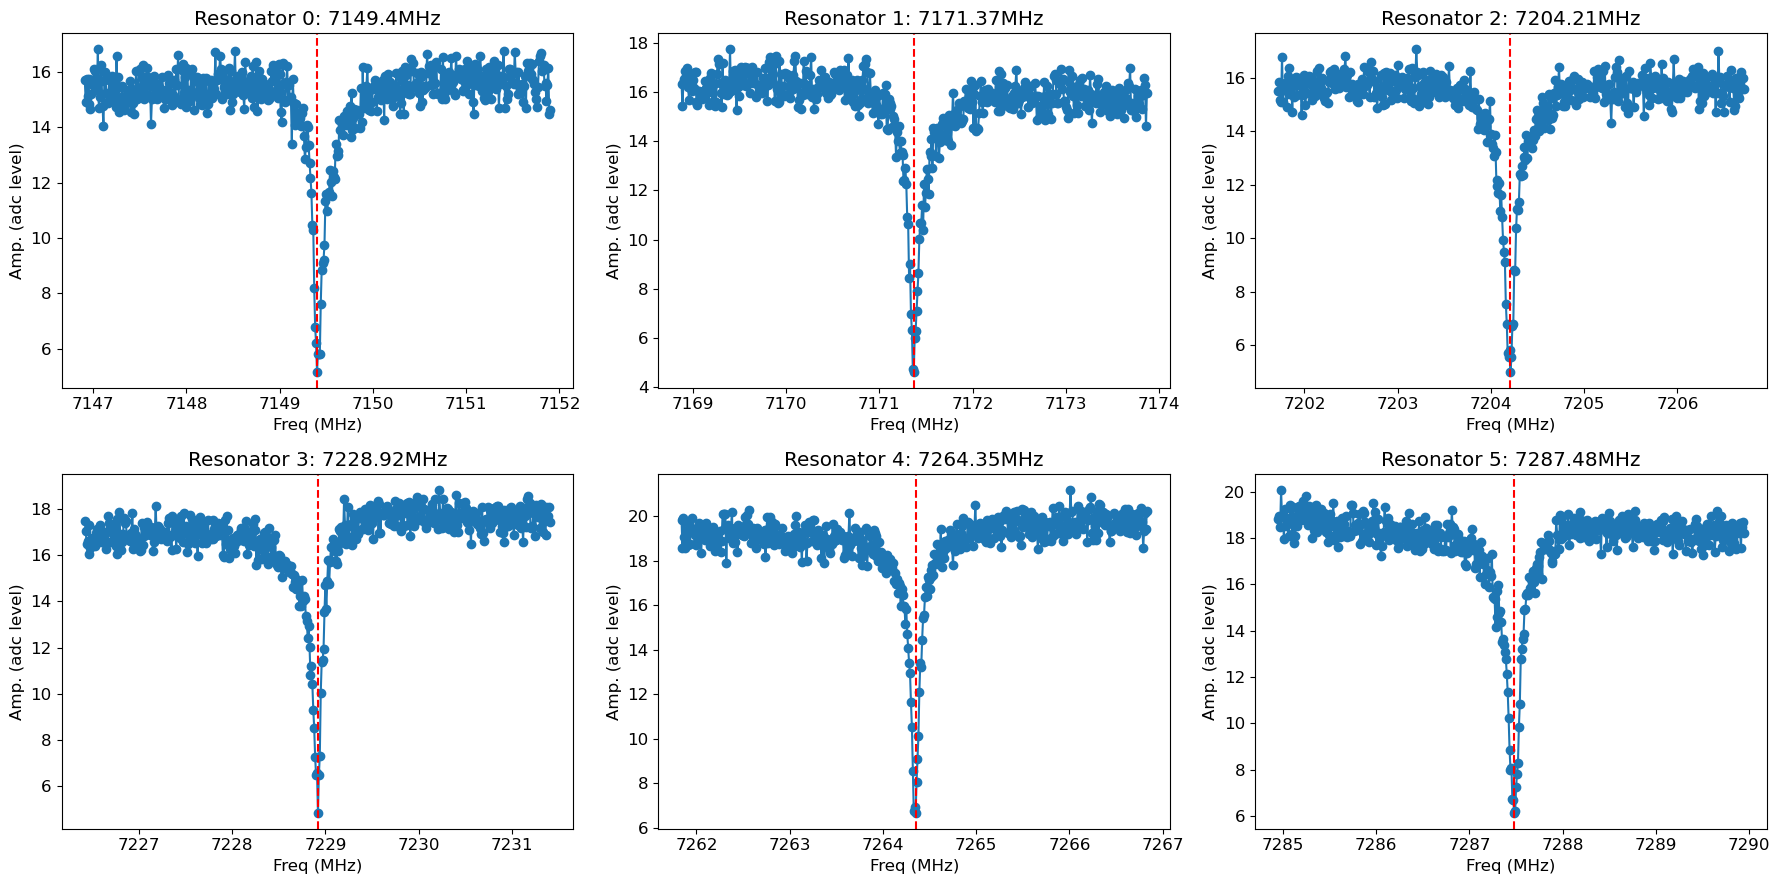

In [86]:
data = r"M:/malab\People\Santi\data\candle_qubit\00000_res_spec_mux_2024-10-24.h5"

with SlabFile(data, 'r') as f:
    fpts = array(f['fpts'])[0]
    amps = array(f['amps'])[0]
    avgi = array(f['avgi'])[0]
    avgq = array(f['avgq'])[0]
    fcenter = array(f['fcenter'])[0]
    config = f.attrs['config']
    config = json.loads(config)

pp.pprint(config)

res_freqs = []
plt.figure(figsize=(18,9))
plt.rcParams.update({'font.size': 12})  # Set base font size

plt.subplot(231, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[0], amps[0],'o-',label="amp")
freq_r1 = fpts[np.argmin(amps[0])]+fcenter[0]
res_freqs.append(freq_r1)
plt.axvline(freq_r1, linestyle='--', color='red')
plt.title('Resonator 0: ' + str(freq_r1) + 'MHz')

plt.subplot(232, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[1], amps[1],'o-',label="amp")
freq_r2 = fpts[np.argmin(amps[1])]+fcenter[1]
res_freqs.append(freq_r2)
plt.axvline(freq_r2, linestyle='--', color='red')
plt.title('Resonator 1: ' + str(freq_r2) + 'MHz')

plt.subplot(233, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[2], amps[2],'o-',label="amp")
freq_r3 = fpts[np.argmin(amps[2])]+fcenter[2]
res_freqs.append(freq_r3)
plt.axvline(freq_r3, linestyle='--', color='red')
plt.title('Resonator 2: ' + str(freq_r3) + 'MHz')

plt.subplot(234, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[3], amps[3],'o-',label="amp")
freq_r4 = fpts[np.argmin(amps[3])]+fcenter[3]
res_freqs.append(freq_r4)
plt.axvline(freq_r4, linestyle='--', color='red')
plt.title('Resonator 3: ' + str(freq_r4) + 'MHz')

plt.subplot(235, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[4], amps[4],'o-',label="amp")
freq_r5 = fpts[np.argmin(amps[4])]+fcenter[4]
res_freqs.append(freq_r5)
plt.axvline(freq_r5, linestyle='--', color='red')
plt.title('Resonator 4: ' + str(freq_r5) + 'MHz')

plt.subplot(236, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[5], amps[5],'o-',label="amp")
freq_r6 = fpts[np.argmin(amps[5])]+fcenter[5]
res_freqs.append(freq_r6)
plt.axvline(freq_r6, linestyle='--', color='red')
plt.title('Resonator 5: ' + str(freq_r6) + 'MHz')

plt.tight_layout()

Fitting Resonators

In [84]:
### Fit ###
fit = Fit()

fit_results = {
    'res0':{},
    'res1':{},
    'res2':{},
    'res3':{},
    'res4':{},
    'res5':{}
}

y_fits = []

for i in range(len(fcenter)):

    freqs = fpts+fcenter[i]

    # Choose the suitable fitting function
    fit_result = fit.reflection_resonator_spectroscopy(freqs, amps[i])

    result = {
            "f": fit_result['f'],
            "kc": fit_result['kc'],
            "ki": fit_result['ki'],
            "k": fit_result['k'],
            "offset": fit_result['offset'],
            "slope": fit_result['slope']
        }
    fit_results['res' + str(i)] = result
    f_r = result['f'][0]
    kc = result['kc'][0]
    k = result['k'][0]
    offset = result['offset'][0]
    slope = result['slope'][0]
    yfit = (offset)-((kc/k) / (1 + (4 * ((freqs - f_r) ** 2) / (k ** 2)))) + slope * freqs
    y_fits.append(yfit)

pp.pprint(fit_results)

{'res0': {'f': [7149.419943248835, 0.0019845250583601075],
          'k': [0.16294715728906065, 0.005914928501450366],
          'kc': [1.5267496835989103, 0.0013496155569153229],
          'ki': [-1.3638025263098497, 0.004565312944535043],
          'offset': [-404.99122323166677, 127.88652390863335],
          'slope': [0.05881841097598473, -0.017887723414840538]},
 'res1': {'f': [7171.377757719199, 0.0019420721508037577],
          'k': [0.17790591832011185, 0.005816779156021399],
          'kc': [1.7772606270263998, 0.0012682925593918313],
          'ki': [-1.5993547087062878, 0.004548486596629568],
          'offset': [1184.3319533884337, 128.09436433894737],
          'slope': [-0.1629078108293592, -0.017861898340866406]},
 'res2': {'f': [7204.201342537774, 0.0015426468085888657],
          'k': [0.18152351057205443, 0.0046259337696357775],
          'kc': [1.8017739146990368, 0.0007802286697142498],
          'ki': [-1.6202504041269823, 0.0038457050999215277],
          'offset'

Plotting with the fit...

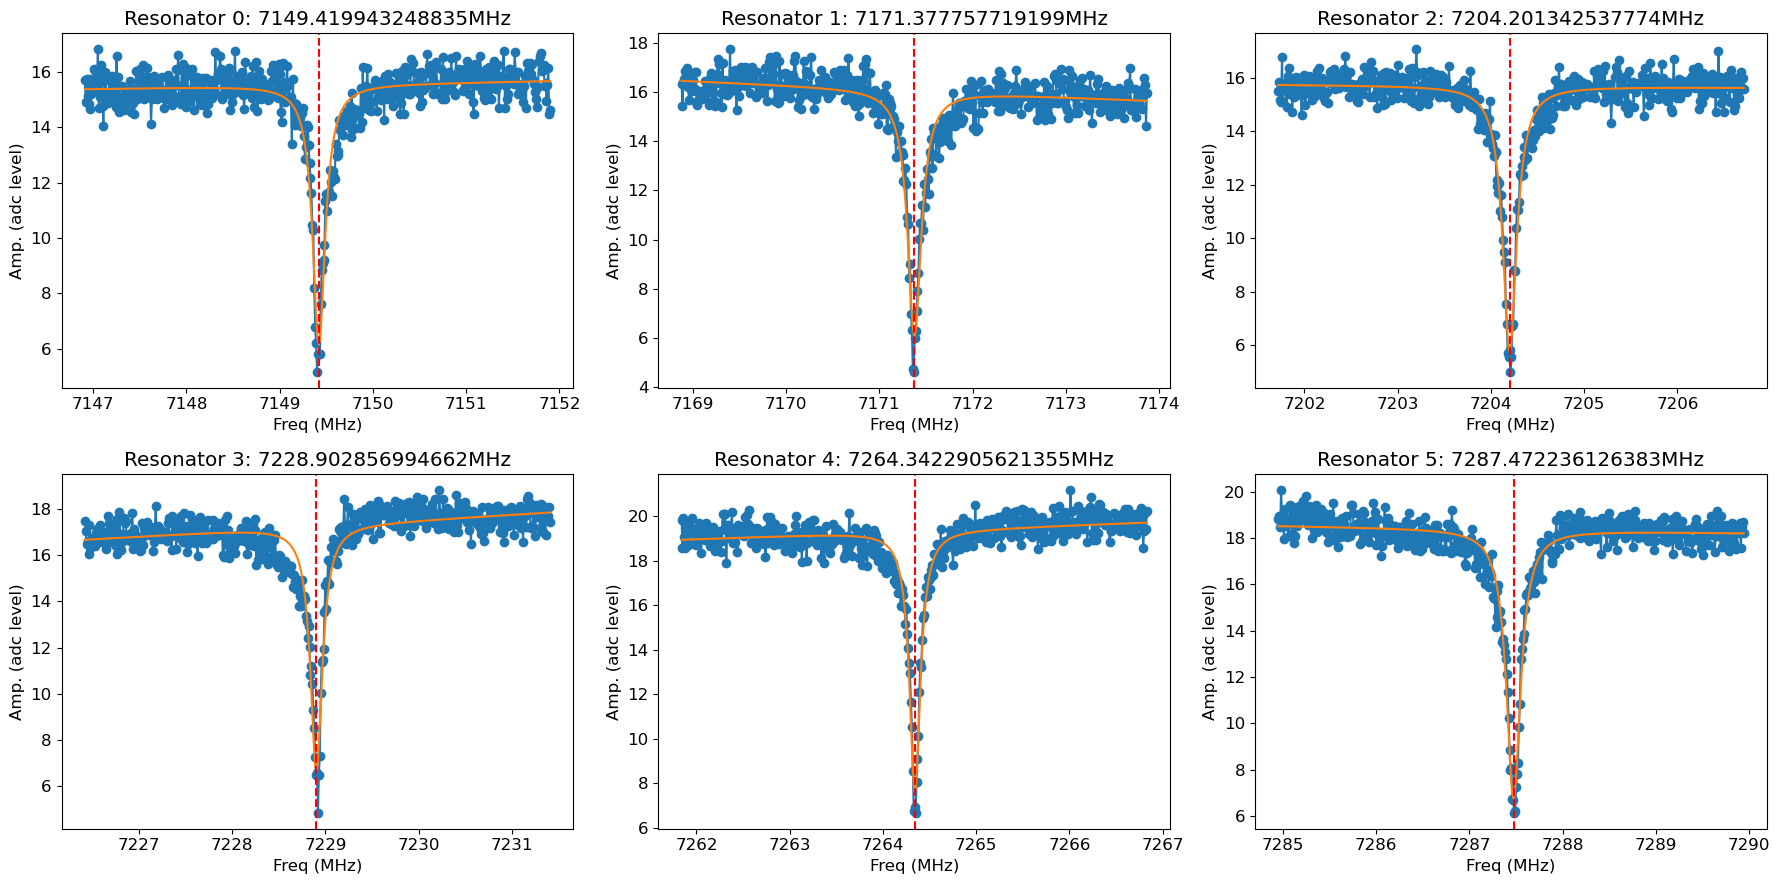

In [87]:
plt.figure(figsize=(18,9))
plt.rcParams.update({'font.size': 12})  # Set base font size

plt.subplot(231, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[0], amps[0],'o-',label="amp")
plt.plot(fpts+fcenter[0], y_fits[0], marker='', label = 'Fitted data')
plt.axvline(fit_results['res0']['f'][0], linestyle='--', color='red')
plt.title('Resonator 0: ' + str(fit_results['res0']['f'][0]) + 'MHz')

plt.subplot(232, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[1], amps[1],'o-',label="amp")
plt.plot(fpts+fcenter[1], y_fits[1], marker='', label = 'Fitted data')
plt.axvline(fit_results['res1']['f'][0], linestyle='--', color='red')
plt.title('Resonator 1: ' + str(fit_results['res1']['f'][0]) + 'MHz')

plt.subplot(233, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[2], amps[2],'o-',label="amp")
plt.plot(fpts+fcenter[2], y_fits[2], marker='', label = 'Fitted data')
plt.axvline(fit_results['res2']['f'][0], linestyle='--', color='red')
plt.title('Resonator 2: ' + str(fit_results['res2']['f'][0]) + 'MHz')

plt.subplot(234, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[3], amps[3],'o-',label="amp")
plt.plot(fpts+fcenter[3], y_fits[3], marker='', label = 'Fitted data')
plt.axvline(fit_results['res3']['f'][0], linestyle='--', color='red')
plt.title('Resonator 3: ' + str(fit_results['res3']['f'][0]) + 'MHz')

plt.subplot(235, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[4], amps[4],'o-',label="amp")
plt.plot(fpts+fcenter[4], y_fits[4], marker='', label = 'Fitted data')
plt.axvline(fit_results['res4']['f'][0], linestyle='--', color='red')
plt.title('Resonator 4: ' + str(fit_results['res4']['f'][0]) + 'MHz')

plt.subplot(236, xlabel="Freq (MHz)", ylabel="Amp. (adc level)")
plt.plot(fpts+fcenter[5], amps[5],'o-',label="amp")
plt.plot(fpts+fcenter[5], y_fits[5], marker='', label = 'Fitted data')
plt.axvline(fit_results['res5']['f'][0], linestyle='--', color='red')
plt.title('Resonator 5: ' + str(fit_results['res5']['f'][0]) + 'MHz')

plt.tight_layout()

### Qubit Spectroscopy


 data path: M:/malab\People\Santi\data\candle_qubit\00000_qubit_spec_ef_Q2_2024-10-25.h5
{'f': [2931.1403807832517, 0.31332780125557663],
 'fit_func': <function Fit.transmission_resonator_spectroscopy.<locals>.<lambda> at 0x00000258871D8E00>,
 'k': [10.31855474211071, 0.9625488616958401],
 'kc': [4.939351201253587, 0.027991517036521214],
 'ki': [5.379203540857122, 0.9345573446593188],
 'offset': [19.531903230392633, 0.004868353324872565]}


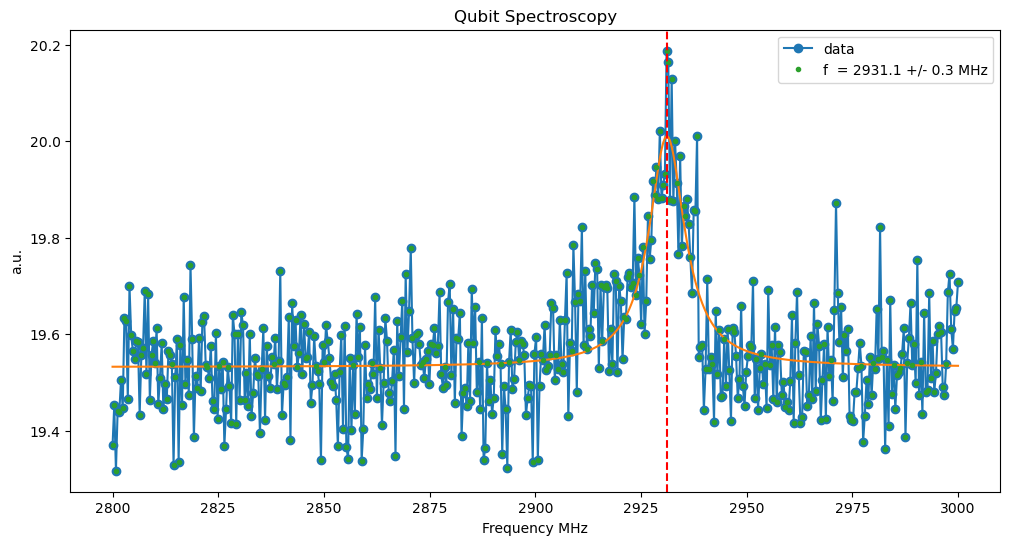

In [90]:
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_qubit_spec_ge_Q0_2024-10-24.h5"
data = r"M:/malab\People\Santi\data\candle_qubit\00000_qubit_spec_ef_Q2_2024-10-25.h5"

with SlabFile(data, 'r') as f:
    freqs = array(f['fpts'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

# pp.pprint(config)

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(freqs, amps, marker='o', label = 'data')
plt.ylabel("a.u.")
plt.xlabel("Qubit Frequency (MHz)")
plt.title('Qubit Spectroscopy')
plt.legend()

fit = Fit()
fit_results = fit.transmission_resonator_spectroscopy(freqs, amps, plot=True)
plt.axvline(fit_results['f'][0], marker='', c='red', linestyle='--')
pp.pprint(fit_results)
plt.show()


### Length Rabi

In [ ]:
data = r"M:/malab\People\Santi\data\candle_qubit\00000_time_rabi_ge_Q5_2024-10-18.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_time_rabi_ef_Q0_2024-10-12.h5"

with SlabFile(data, 'r') as f:
    lengths = array(f['lengths'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    # pop_norm = array(f['pop_norm'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

pp.pprint(config)

# parameters used to calculate fit equation
freq = fit_result['f'][0]
phase = fit_result['phase'][0]
T = fit_result['T'][0]
amp = fit_result['amp'][0]
offset = fit_result['offset'][0]
y_fit = amp * (np.sin(0.5 * (2 * np.pi * freq) * lengths + phase))**2 * np.exp(-lengths / T) + offset
fit_std = (amps - y_fit).std()

peak = 0.5 / freq
print("\n fitting error = ",fit_std )
print('\n peak amp at %f' % (peak))

print('\n')
pp.pprint(fit_result)

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(lengths, amps, marker='o', label = 'data')
plt.plot(lengths, y_fit, marker='', label = 'Fitted data')
plt.ylabel("a.u.")
plt.xlabel(r"Pulse Length ($\mu s$)")
plt.title(r'Length Rabi Oscillations')
plt.legend()
plt.axvline(peak, marker='', c='red') # The frequency that you will put into config['f_res']
plt.show()

### Amplitude Rabi

Some sort of issue with the e and g collection for this expeirment. Works fine for Ramsey, but for this rabi experimnet the mean g and mean e are basically equal...


 data path: M:/malab\People\Santi\data\candle_qubit\00000_power_rabi_ge_Q0_2024-10-31.h5
[0.49813357624020754, 3.971636363636364, -90.0, 0.9970701336751511, 0.47155667870128887]
array([  0.50252465,   1.4526195 , -86.37235255,  17.88169894,
         0.48229119])
Peak: 0.34420576045536955


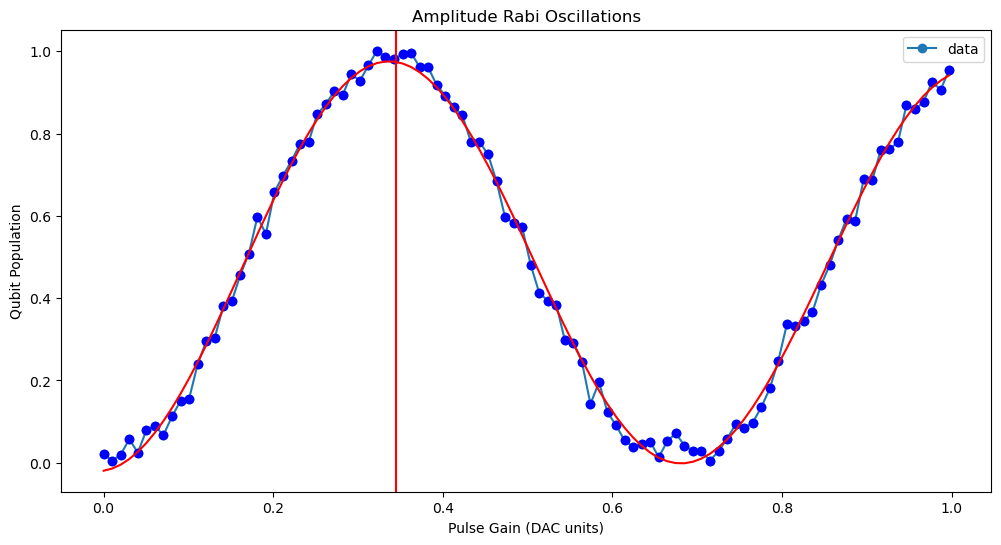

In [78]:
data = r"M:/malab\People\Santi\data\candle_qubit\00000_power_rabi_ge_Q0_2024-10-31.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_power_rabi_ef_Q4_2024-10-25.h5"

SS = True # did we do SingleShot for ge normalization?
ef = False # is this an ef experiment (is our single shot checking for ef?)
with SlabFile(data, 'r') as f:
    gains = array(f['gains'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == True:
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
        if ef == True:
            If = array(f['I_f'])[0]
            Qf = array(f['Q_f'])[0]
# pp.pprint(config)

if SS == True:
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e - g) / abs(e - g)**2)
    if ef == True:
        f = np.mean((If+1j*Qf))
        pop_norm = abs(((I+1j*Q) - e)*(f - e) / abs(f - e)**2)
    ydata = pop_norm
else:
    ydata = amps

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(gains, ydata,marker='o', label='data')
if SS == True:
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Pulse Gain (DAC units)")
plt.title(r'Amplitude Rabi Oscillations')
plt.legend()

fit = Fit()
# fit_results = fit.rabi(gains, ydata, plot=True)
# pp.pprint(fit_results)
# peak = 0.5 / fit_results['f'][0] - (fit_results['phase'][0]/(180*fit_results['f'][0]))
# print('Peak:', peak)
# plt.axvline(peak, marker='', c='red')

fit_results = fitdecaysin(gains, ydata, showfit=True)
pp.pprint(fit_results)
peak = 0.5 / fit_results[1]
print('Peak:', peak)
plt.axvline(peak, marker='', c='red')

### T2 Ramsey


 data path: M:/malab\People\Santi\data\candle_qubit\00000_Ramsey_ge_Q0_2024-10-31.h5
{'T2': [68.30954443614053, 2.5510301751175777],
 'amp': [0.990401809997247, 0.025437959153812993],
 'f': [0.05077906647195374, 9.051669791910654e-05],
 'final_offset': [0.5267182849552945, 0.003006947445387234],
 'fit_func': <function Fit.ramsey.<locals>.<lambda> at 0x00000258889C8C20>,
 'initial_offset': [0.43170464121845387, 0.013120570910748135],
 'phase': [6.2206478176118685, 0.0277544094699346]}


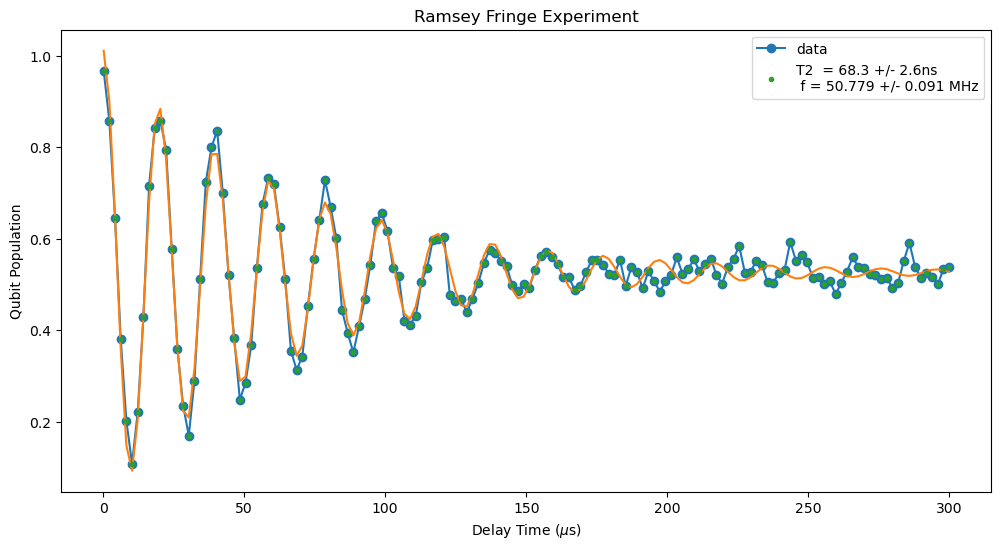

In [79]:
data = r"M:/malab\People\Santi\data\candle_qubit\00000_Ramsey_ge_Q0_2024-10-31.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00003_Ramsey_ef_Q1_2024-10-25.h5"


SS = True
ef = False # is this an ef experiment (is our single shot checking for ef?)
with SlabFile(data, 'r') as f:
    delay_times = array(f['delay_times'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == True:
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
        if ef == True:
            If = array(f['I_f'])[0]
            Qf = array(f['Q_f'])[0]
# pp.pprint(config)

if SS == True:
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
    if ef == True:
        f = np.mean((If+1j*Qf))
        pop_norm = abs(((I+1j*Q) - e)*(f- e) / abs(f - e)**2)
    ydata = pop_norm
else:
    ydata = amps

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(delay_times, ydata,marker='o', label='data')
if SS == True:
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Delay Time ($\mu$s)")
plt.title(r'Ramsey Fringe Experiment')
plt.legend()

fit = Fit()
fit_results = fit.ramsey(delay_times, ydata, plot=True)
pp.pprint(fit_results)


### T2 Spin Echo


 data path: M:/malab\People\Santi\data\candle_qubit\00000_SpinEcho_ge_Q0_2024-10-31.h5
{'T2': [144.0733623428746, 8.055025962818243],
 'amp': [0.33586174574330163, 0.011756313957572427],
 'f': [0.05019320082552376, 6.332149099479938e-05],
 'final_offset': [0.8555425199878736, 0.0027645456521648093],
 'fit_func': <function Fit.ramsey.<locals>.<lambda> at 0x00000258872FC360>,
 'initial_offset': [0.8235843829992061, 0.028870615678826924],
 'phase': [3.0015133379910726, 0.03640790285211246]}


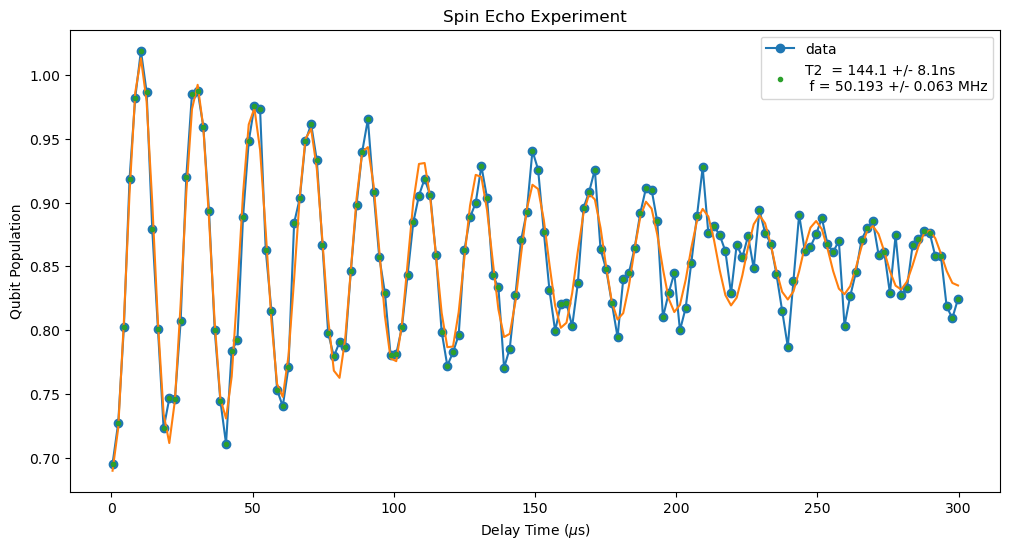

In [75]:
data = r"M:/malab\People\Santi\data\candle_qubit\00000_SpinEcho_ge_Q0_2024-10-31.h5"
SS = True
with SlabFile(data, 'r') as f:
    delay_times1 = array(f['delay_times1'])[0]
    delay_times2 = array(f['delay_times2'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == True:
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
# pp.pprint(config)

if SS == True:
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
    ydata = pop_norm
else:
    ydata = amps

delay_times = delay_times1 + delay_times2

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(delay_times, ydata,marker='o', label='data')
if SS == True:
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Delay Time ($\mu$s)")
plt.title(r'Spin Echo Experiment')
plt.legend()

fit = Fit()
fit_results = fit.ramsey(delay_times, ydata, plot=True)
pp.pprint(fit_results)


### T1


 data path: M:/malab\People\Santi\data\candle_qubit\00000_t1_ge_Q5_2024-10-19.h5
{'T1': [73.68450119543752, 3.1344874029712066],
 'amp': [0.9348958605108407, 0.02077114696646806],
 'final_offset': [0.05406059236586904, 0.006665755229742552],
 'fit_func': <function Fit.T1.<locals>.<lambda> at 0x00000184239C3EC0>}


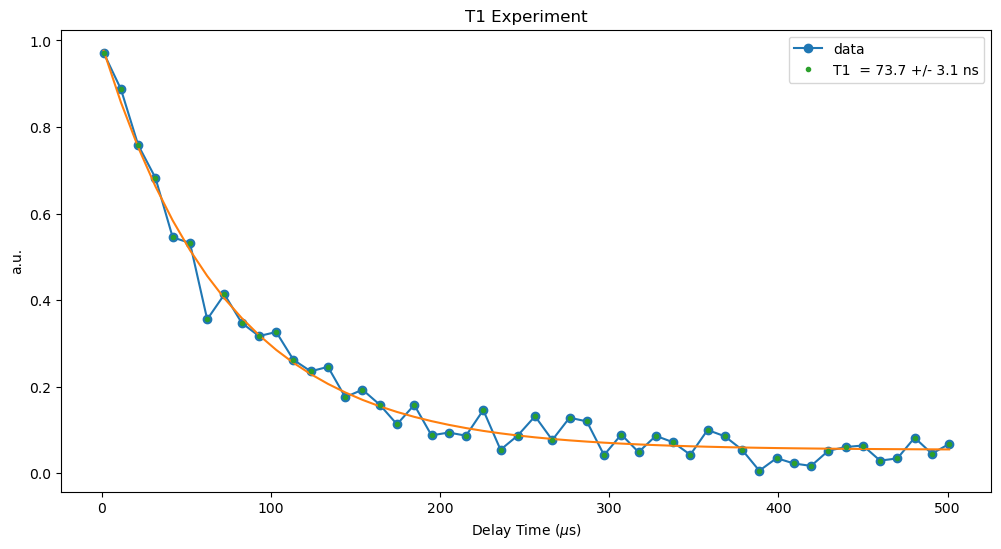

In [57]:
data = r"M:/malab\People\Santi\data\candle_qubit\00000_t1_ge_Q5_2024-10-19.h5"
SS = True
with SlabFile(data, 'r') as f:
    delay_times = array(f['delay_times'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == True:
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
# pp.pprint(config)


if SS == True:
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
    ydata = pop_norm
else:
    ydata = amps

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(delay_times, ydata, marker='o', label='data')
if SS == True:
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Delay Time ($\mu$s)")
plt.title(r'T1 Experiment')
plt.legend()

fit = Fit()
fit_results = fit.T1(delay_times, ydata, plot=True)
pp.pprint(fit_results)


### Single Shot Experiment

{'SS_ONLY': True,
 'mixer_freq': 7000,
 'mux_ch': 4,
 'mux_ro_chs': [2, 3, 4, 5, 6, 7],
 'nqz_qubit': 1,
 'nqz_res': 2,
 'py_avg': 1,
 'qubit_ch': 0,
 'qubit_ch_ef': 0,
 'qubit_freq_ef': 2794.739,
 'qubit_freq_ge': 2963.295,
 'qubit_gain_ef': 0.0891,
 'qubit_gain_ge': 0.344206,
 'qubit_length_ef': 25.0,
 'qubit_length_ge': 25.0,
 'qubit_phase': 0,
 'relax_delay': 1000,
 'reps': 1,
 'res_ch': 1,
 'res_freq_ef': 7149.096,
 'res_freq_ge': 7148.975,
 'res_gain_ef': 0.05,
 'res_gain_ge': 0.095,
 'res_length': 6.0,
 'res_phase': 0,
 'ro_ch': 0,
 'ro_length': 6.0,
 'sigma': 0.04,
 'sigma_ef': 0.2,
 'steps': 10000,
 'threshold': 0,
 'trig_time': 0.5}

 data path: M:/malab\People\Santi\data\candle_qubit\00007_IQ_plot_Q0_2024-10-31.h5


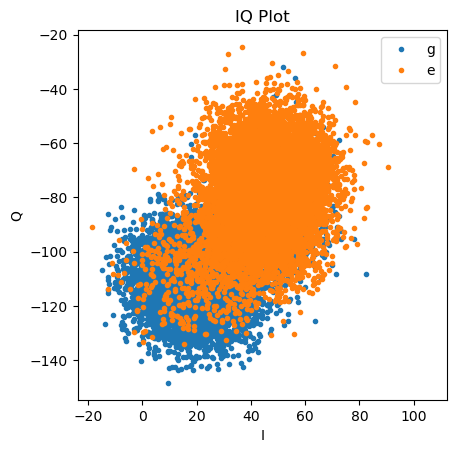

In [87]:
data = r"M:/malab\People\Santi\data\candle_qubit\00007_IQ_plot_Q0_2024-10-31.h5"
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_qubit_temp_Q0_2024-10-25.h5"

ef = False
with SlabFile(data, 'r') as f:
    I_g = array(f['I_g'])[0]
    Q_g = array(f['Q_g'])[0]
    I_e = array(f['I_e'])[0]
    Q_e = array(f['Q_e'])[0]
    if ef == True:
        I_f = array(f['I_f'])[0]
        Q_f = array(f['Q_f'])[0]
    config = f.attrs['config']
    config = json.loads(config)

pp.pprint(config)

print('\n data path:', data)

# fid, threshold, angle = hist(data=[I_g, Q_g, I_e, Q_e],  plot=True, ran=1000)
# print('Optimal fidelity after rotation = %.3f' % fid)

plt.title('IQ Plot')
plt.plot(I_g, Q_g, '.',label = 'g')
plt.plot(I_e, Q_e, '.',label = 'e')
if ef == True:
    plt.plot(I_f, Q_f, '.',label = 'f')
plt.xlabel('I')
plt.ylabel('Q')
plt.legend()
plt.axis('square')
plt.show()

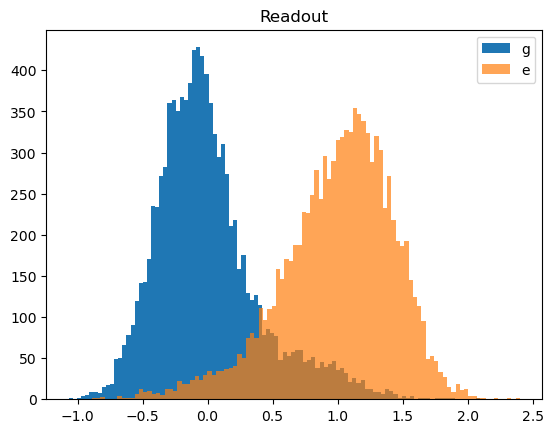

max fidelity =  0.7765
sigma_g = 0.4019659151316737
sigma_e = 0.4302799214143771


In [88]:
vec_I = np.mean(I_e) - np.mean(I_g)
vec_Q = np.mean(Q_e) - np.mean(Q_g)
gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
estate = (I_e - np.mean(I_g))*vec_I + (Q_e - np.mean(Q_g))*vec_Q
gstate = gstate / abs(vec_I+1j*vec_Q)**2
estate = estate / abs(vec_I+1j*vec_Q)**2
plt.hist(gstate,bins = 100,label = 'g')
plt.hist(estate,bins = 100,label = 'e',alpha=0.7)
plt.legend()
plt.title("Readout")
plt.show()
th_min = min(gstate)
th_max = max(estate)
th_list = np.linspace(th_min,th_max,1000)
fidelity = [(sum(gstate<th)+sum(estate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
print('max fidelity = ',max(fidelity)*2-1)
print('sigma_g =',np.std(gstate))
print('sigma_e =',np.std(estate))

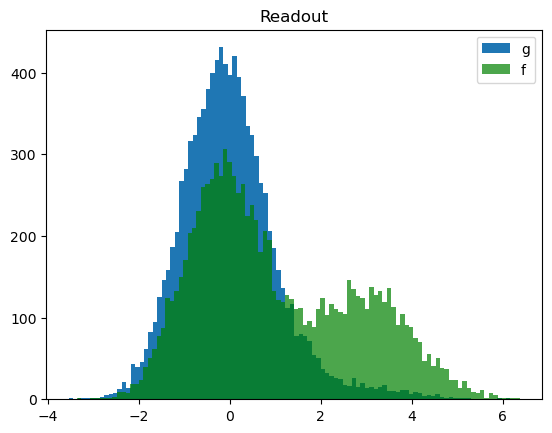

max fidelity =  0.2795000000000001
sigma_g = 1.0795996447928013
sigma_f = 1.7537828465463585


In [71]:
vec_I = np.mean(I_f) - np.mean(I_g)
vec_Q = np.mean(Q_f) - np.mean(Q_g)
gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
fstate = (I_f - np.mean(I_g))*vec_I + (Q_f - np.mean(Q_g))*vec_Q
gstate = gstate / abs(vec_I+1j*vec_Q)**2
fstate = fstate / abs(vec_I+1j*vec_Q)**2
plt.hist(gstate,bins = 100,label = 'g')
plt.hist(fstate,bins = 100,label = 'f',alpha=0.7, color='g')
plt.legend()
plt.title("Readout")
plt.show()
th_min = min(gstate)
th_max = max(fstate)
th_list = np.linspace(th_min,th_max,1000)
fidelity = [(sum(gstate<th)+sum(fstate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
print('max fidelity = ',max(fidelity)*2-1)
print('sigma_g =',np.std(gstate))
print('sigma_f =',np.std(fstate))

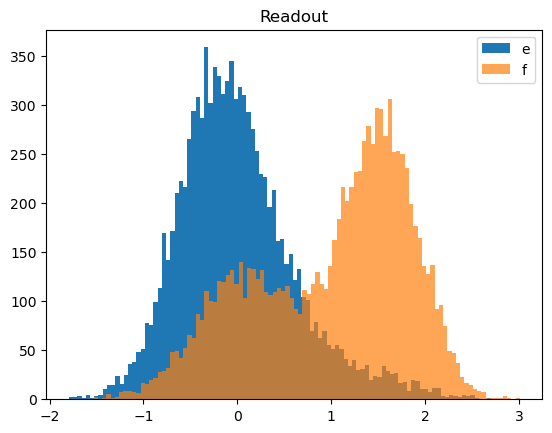

max fidelity =  0.5444
sigma_e = 0.6237502131468022
sigma_f = 0.8217842242107656


In [72]:
vec_I = np.mean(I_f) - np.mean(I_e)
vec_Q = np.mean(Q_f) - np.mean(Q_e)
estate = (I_e - np.mean(I_e))*vec_I + (Q_e - np.mean(Q_e))*vec_Q
fstate = (I_f - np.mean(I_e))*vec_I + (Q_f - np.mean(Q_e))*vec_Q
estate = estate / abs(vec_I+1j*vec_Q)**2
fstate = fstate / abs(vec_I+1j*vec_Q)**2
plt.hist(estate,bins = 100,label = 'e')
plt.hist(fstate,bins = 100,label = 'f',alpha=0.7)
plt.legend()
plt.title("Readout")
plt.show()
th_min = min(estate)
th_max = max(fstate)
th_list = np.linspace(th_min,th_max,1000)
fidelity = [(sum(estate<th)+sum(fstate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
print('max fidelity = ',max(fidelity)*2-1)
print('sigma_e =',np.std(estate))
print('sigma_f =',np.std(fstate))

### Optimize Readout


 data path: M:/malab\People\Santi\data\candle_qubit\00000_Readout_Optimization_ge_Q0_2024-10-31.h5


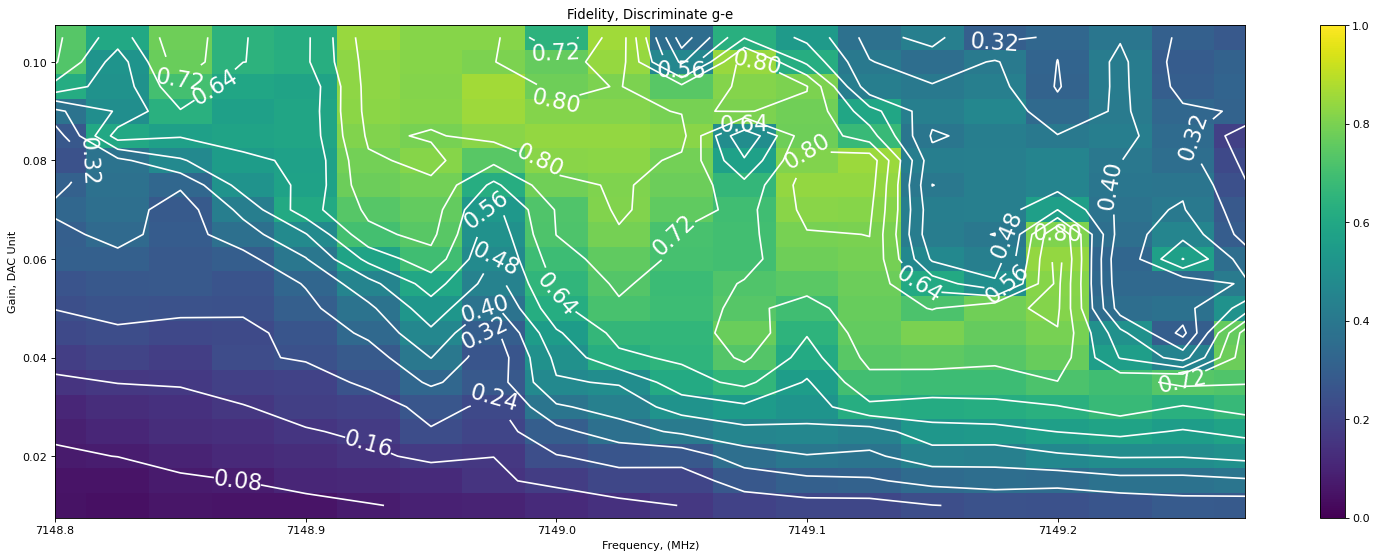

In [56]:
data = r"M:/malab\People\Santi\data\candle_qubit\00000_Readout_Optimization_ge_Q0_2024-10-31.h5"

with SlabFile(data, 'r') as f:
    # freqs_list =  array(f['freqs_list'])[0]
    # gains_list = array(f['gains_list'])[0]
    I_g_array = array(f['I_g_array'])[0]
    Q_g_array = array(f['Q_g_array'])[0]
    I_e_array = array(f['I_e_array'])[0]
    Q_e_array = array(f['Q_e_array'])[0]
    # I_g_array = array(f['I_g'])[0]
    # Q_g_array = array(f['Q_g'])[0]
    # I_e_array = array(f['I_e'])[0]
    # Q_e_array = array(f['Q_e'])[0]
    config = f.attrs['config']
    config = json.loads(config)

# print(config)
freq_start = config['freq_start']
freq_steps = config['freq_steps']
freq_step_size = config['freq_step_size']
gain_start = config['gain_start']
gain_steps = config['gain_steps']
gain_step_size = config['gain_step_size']

freqs_list = np.zeros(freq_steps)
gains_list = np.zeros(gain_steps)
for gain in range(gain_steps):
    gains_list[gain] = gain_start + gain_step_size*gain
for freq in range(freq_steps):
    freqs_list[freq] = freq_start + freq_step_size*freq

fid_Array =np.zeros((gain_steps,freq_steps))
for index_freq in range(freq_steps):
    for index_amp in range(gain_steps):
        I_g = I_g_array[index_freq][0][index_amp][0]
        Q_g = Q_g_array[index_freq][0][index_amp][0]
        I_e = I_e_array[index_freq][0][index_amp][0]
        Q_e = Q_e_array[index_freq][0][index_amp][0]
        vec_I = np.mean(I_e) - np.mean(I_g)
        vec_Q = np.mean(Q_e) - np.mean(Q_g)
        gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
        estate = (I_e - np.mean(I_g))*vec_I + (Q_e - np.mean(Q_g))*vec_Q
        gstate = gstate / abs(vec_I+1j*vec_Q)**2
        estate = estate / abs(vec_I+1j*vec_Q)**2

        th_min = min(gstate)
        th_max = max(estate)
        th_list = np.linspace(th_min,th_max,1000)
        fidelity = [(sum(gstate<th)+sum(estate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
        fid_Array[index_freq, index_amp] = max(fidelity)*2-1

print('\n data path:', data)


plt.figure(figsize=(24, 8), dpi=80)
normalize = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
figA = plt.pcolormesh(freqs_list, gains_list, fid_Array.T,  norm=normalize)
figB = plt.contour(freqs_list, gains_list, fid_Array.T, 10 ,colors='w')
plt.clabel(figB, figB.levels, inline=True, fontsize=20)
plt.ylabel(r"Gain, DAC Unit")
plt.xlabel(r"Frequency, (MHz)")
plt.title(r"Fidelity, Discriminate g-e")
plt.colorbar(figA)
plt.show()
#plt.savefig("FidwithoutJPA.png",dpi=300,bbox_inches='tight')

In [59]:
index_freq_0, index_amp_0 = np.where(fid_Array==np.max(fid_Array))
print(gains_list[index_amp_0[0]])
print(freqs_list[index_freq_0[0]])

0.095
7148.975


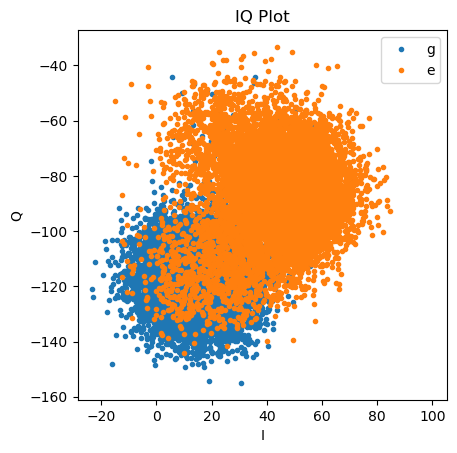

In [60]:
I_g = I_g_array[index_freq_0[0]][0][index_amp_0[0]][0]
Q_g = Q_g_array[index_freq_0[0]][0][index_amp_0[0]][0]
I_e = I_e_array[index_freq_0[0]][0][index_amp_0[0]][0]
Q_e = Q_e_array[index_freq_0[0]][0][index_amp_0[0]][0]
# I_g = I_g_array[9][0][15][0]
# Q_g = Q_g_array[9][0][15][0]
# I_e = I_e_array[9][0][15][0]
# Q_e = Q_e_array[9][0][15][0]
plt.title('IQ Plot')
plt.plot(I_g, Q_g, '.',label = 'g')
plt.plot(I_e, Q_e, '.',label = 'e')
plt.xlabel('I')
plt.ylabel('Q')
plt.legend()
plt.axis('square')
plt.show()

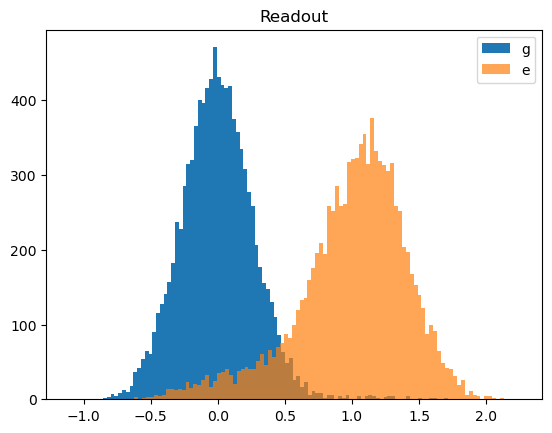

max fidelity =  0.861
sigma_g = 0.27849995222784985
sigma_e = 0.4098236780444059


In [61]:
vec_I = np.mean(I_e) - np.mean(I_g)
vec_Q = np.mean(Q_e) - np.mean(Q_g)
gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
estate = (I_e - np.mean(I_g))*vec_I + (Q_e - np.mean(Q_g))*vec_Q
gstate = gstate / abs(vec_I+1j*vec_Q)**2
estate = estate / abs(vec_I+1j*vec_Q)**2
plt.hist(gstate,bins = 100,label = 'g')
plt.hist(estate,bins = 100,label = 'e',alpha=0.7)
plt.legend()
plt.title("Readout")
plt.show()
th_min = min(gstate)
th_max = max(estate)
th_list = np.linspace(th_min,th_max,1000)
fidelity = [(sum(gstate<th)+sum(estate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
print('max fidelity = ',max(fidelity)*2-1)
print('sigma_g =',np.std(gstate))
print('sigma_e =',np.std(estate))

Optimal fidelity after rotation = 0.861


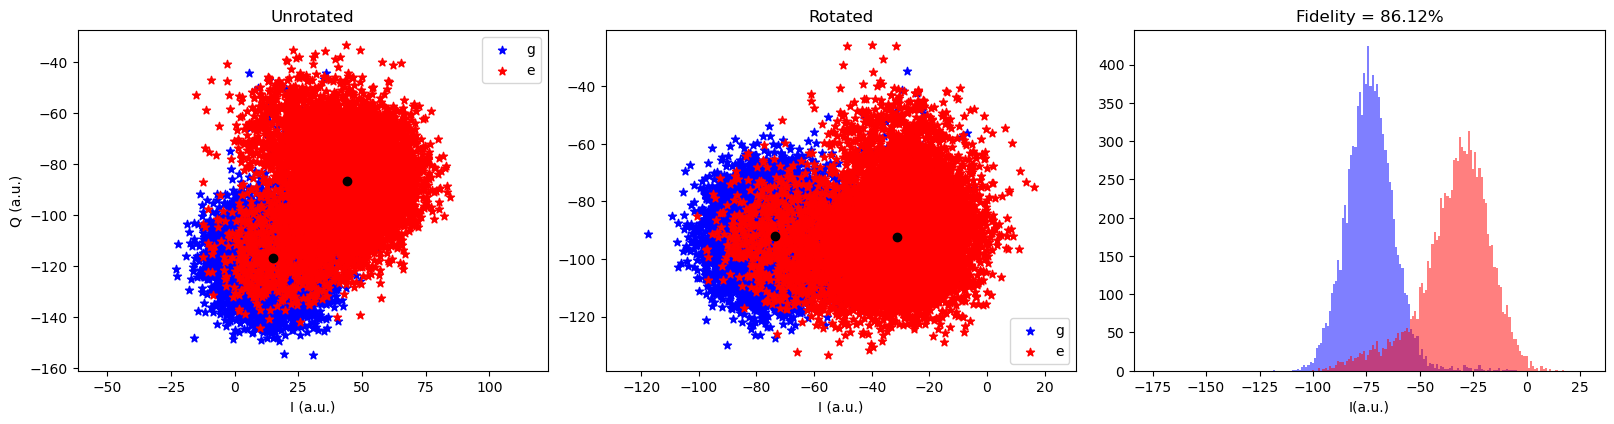

In [43]:
fid, threshold, angle = hist(data=[I_g, Q_g, I_e, Q_e],  plot=True, ran=100)
print('Optimal fidelity after rotation = %.3f' % fid)

In [ ]:
data = r"M:/malab\People\Santi\data\candle_qubit\00001_readout_opt_Q0_2024-10-09.h5"

with SlabFile(data, 'r') as f:
    freqs_list =  array(f['freqs_list'])[0]
    lengths_list = array(f['lengths_list'])[0]
    I_g_array = array(f['I_g_array'])[0]
    Q_g_array = array(f['Q_g_array'])[0]
    I_e_array = array(f['I_e_array'])[0]
    Q_e_array = array(f['Q_e_array'])[0]

freq_steps = len(freqs_list)
length_steps = len(lengths_list)

fid_Array =np.zeros([freq_steps,length_steps])
for index_freq in range(freq_steps):
    for index_length in range(length_steps):
        I_g = I_g_array[index_freq][0][index_length][0]
        Q_g = Q_g_array[index_freq][0][index_length][0]
        I_e = I_e_array[index_freq][0][index_length][0]
        Q_e = Q_e_array[index_freq][0][index_length][0]
        vec_I = np.mean(I_e) - np.mean(I_g)
        vec_Q = np.mean(Q_e) - np.mean(Q_g)
        gstate = (I_g - np.mean(I_g))*vec_I + (Q_g - np.mean(Q_g))*vec_Q
        estate = (I_e - np.mean(I_g))*vec_I + (Q_e - np.mean(Q_g))*vec_Q
        gstate = gstate / abs(vec_I+1j*vec_Q)**2
        estate = estate / abs(vec_I+1j*vec_Q)**2

        th_min = min(gstate)
        th_max = max(estate)
        th_list = np.linspace(th_min,th_max,1000)
        fidelity = [(sum(gstate<th)+sum(estate>th))/np.shape(gstate)[0]/2 for i,th in enumerate(th_list)]
        fid_Array[index_freq,index_length] = max(fidelity)*2-1

print('\n data path:', data)

plt.figure(figsize=(24, 8), dpi=80)
figA = plt.pcolormesh(lengths_list,freqs_list,fid_Array)
figB = plt.contour(lengths_list,freqs_list,fid_Array, 10 ,colors='w')
plt.clabel(figB, figB.levels, inline=True, fontsize=20)
plt.xlabel(r"length, us")
plt.ylabel(r"Frequency, (MHz)")
plt.title(r"Fidelity, Discriminate g-e")
plt.colorbar(figA)
plt.show()

# Qubit Temp


 data path: M:/malab\People\Santi\data\candle_qubit\00000_qubit_temp_Q4_2024-10-27.h5
{'T': [1.7738872682794216, 0.6230590726603685],
 'amp': [-0.24552107760633118, 0.04375576861087672],
 'f': [2.6750975365562852, 0.04797946512168645],
 'fit_func': <function Fit.rabi.<locals>.<lambda> at 0x000001843AB07BA0>,
 'offset': [29.75856140909439, 0.014717939264995072],
 'phase': [4.894680357178871, 0.1263535545460162]}
Peak: 0.14419492868977604


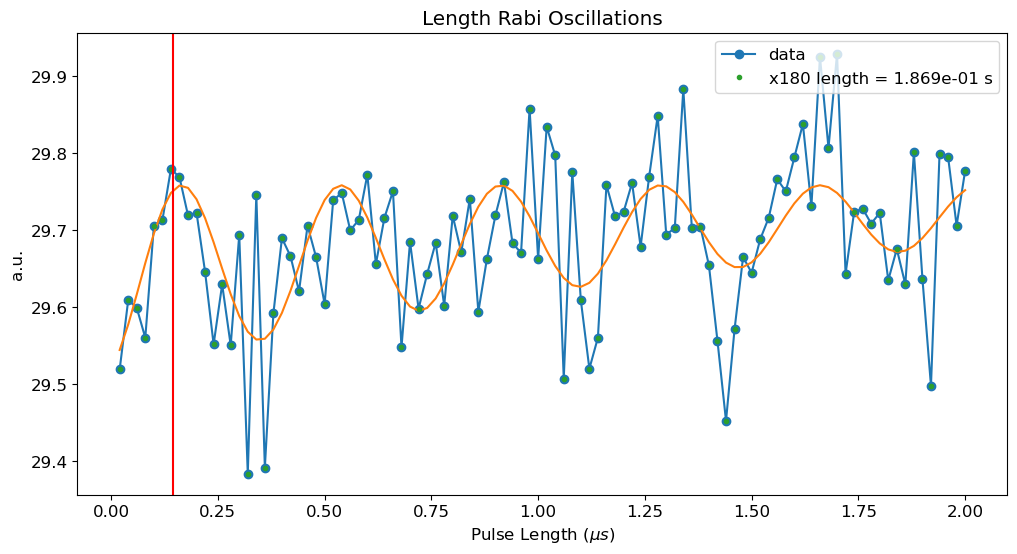

In [489]:
# data = r"M:/malab\People\Santi\data\candle_qubit\00000_time_rabi_ge_Q0_2024-10-10.h5"
data = r"M:/malab\People\Santi\data\candle_qubit\00000_qubit_temp_Q4_2024-10-27.h5"

SS = False
ef = True
with SlabFile(data, 'r') as f:
    lengths = array(f['lengths'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    I_ref = array(f['avgi_ref'])[0]
    Q_ref = array(f['avgq_ref'])[0]
    amps_ref = array(f['amps_ref'])[0]
    # fit_result_ref = f.attrs['fit_result_ref']
    # fit_result_ref = json.loads(fit_result_ref)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == True:
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
        if ef == True:
            If = array(f['I_f'])[0]
            Qf = array(f['Q_f'])[0]

# pp.pprint(config)

if SS == True:
    # Normalize data
    e = np.mean((Ie+1j*Qe))
    g = np.mean((Ig+1j*Qg))
    ### Normalization ###
    # g-e discrimination
    pop_norm = abs(((I+1j*Q) - g)*(e - g) / abs(e - g)**2)
    pop_norm_ref = abs(((I_ref+1j*Q_ref) - g)*(e - g) / abs(e - g)**2)
    
    if ef == True: # in this case we are reading out e and f state
        f = np.mean((If+1j*Qf))
        # e-f discrimination
        pop_norm = abs(((I+1j*Q) - e)*(f - e) / abs(f - e)**2)
        pop_norm_ref = abs(((I_ref+1j*Q_ref) - e)*(f- e) / abs(f - e)**2)
        # g-f discrimation
        # pop_norm = abs(((I+1j*Q) - g)*(f- g) / abs(f - g)**2)
        # pop_norm_ref = abs(((I_ref+1j*Q_ref) - g)*(f- g) / abs(f - g)**2)
    ydata = pop_norm
    ydata_ref = pop_norm_ref
else:
    ydata = amps
    ydata_ref = amps_ref

print('\n data path:', data)

plt.figure(figsize=(12,6))
plt.plot(lengths, ydata, marker='o', label='data')
# plt.plot(lengths, ydata_ref, marker='o', label='ref_data')
if SS == True:
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Pulse Length ($\mu s$)")
plt.title(r'Length Rabi Oscillations')
plt.legend()

fit = Fit()
# fit_results = fitdecaysin(lengths, ydata, showfit=True)
# pp.pprint(fit_results)
# peak = 0.5 / fit_results[1] + (fit_results[2]/(180*np.pi*fit_results[1]))
# print('Peak:', peak)
# plt.axvline(peak, marker='', c='green', linestyle='--')

# fit_results_ref = fitdecaysin(lengths, ydata_ref, showfit=True)
# pp.pprint(fit_results_ref)
# peak_ref = 0.5 / fit_results_ref[1] #- (fit_results_ref[2]/(360*np.pi*fit_results_ref[1]))
# print('Ref Peak:', peak_ref)
# plt.axvline(peak_ref, marker='', c='blue', linestyle='--')

fit_results = fit.rabi(lengths, ydata, plot = True)
pp.pprint(fit_results)
peak = 0.5 / fit_results['f'][0] - (fit_results['phase'][0]/(360/np.pi))
print('Peak:', peak)
plt.axvline(peak, marker='', c='red')

# fit_results_ref = fit.rabi(lengths, ydata_ref, plot = True)
# pp.pprint(fit_results_ref)

plt.show()

{'T': [1.7738872682794216, 0.6230590726603685],
 'amp': [-0.24552107760633118, 0.04375576861087672],
 'f': [2.6750975365562852, 0.04797946512168645],
 'fit_func': <function Fit.rabi.<locals>.<lambda> at 0x000001843AB82160>,
 'offset': [29.75856140909439, 0.014717939264995072],
 'phase': [4.894680357178871, 0.1263535545460162]}
Peak: 0.14419492868977604
[3.7125876213900195, 5.0, 90.0, 1.98, 26.60623962761035]
array([  3.84766296,   2.70966048, 270.83709939,  10.1281879 ,
        26.61602597])
Peak: 0.18452496281390812


C:\Users\G41Lab\AppData\Local\Temp\ipykernel_39248\974763096.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\G41Lab\AppData\Local\Temp\ipykernel_39248\974763096.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


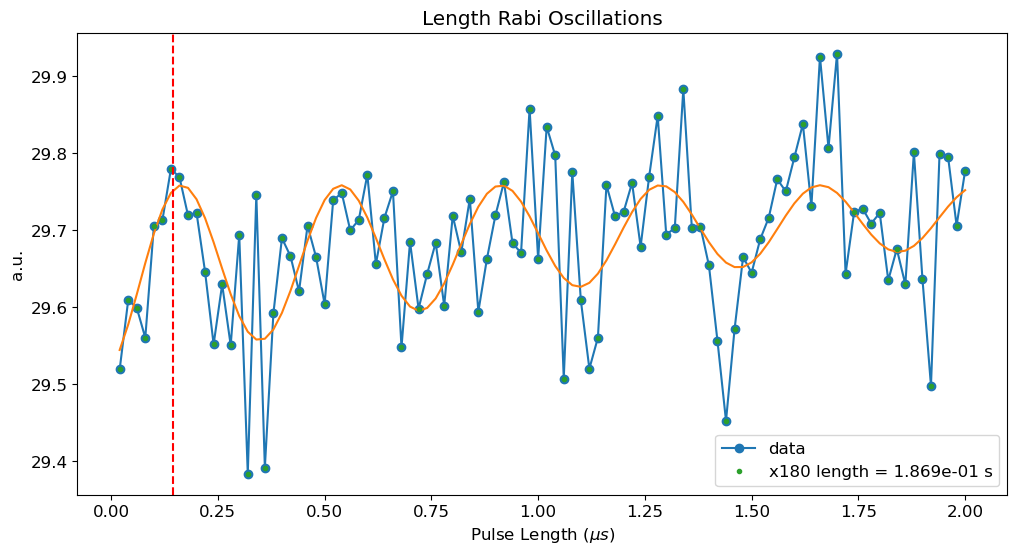

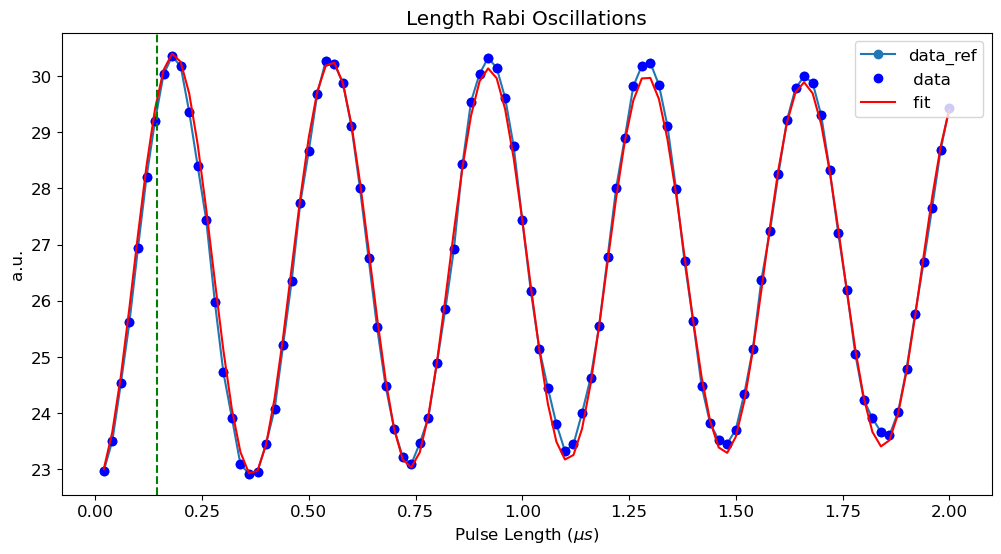

In [490]:
fig, ax0 = plt.subplots(1, figsize=(12,6))
fit = Fit()

ax0.plot(lengths, ydata, marker='o', label='data')
fit_func = True
if fit_func == True:
    fit_results = fit.rabi(lengths, ydata, plot = True)
    pp.pprint(fit_results)
    peak = 0.5 / fit_results['f'][0] - (fit_results['phase'][0]/(360/np.pi))
else:
    fit_results = fitdecaysin(lengths, ydata, showfit=True)
    pp.pprint(fit_results)
    peak = 0.5 / fit_results[1] - (fit_results[2]/(180*np.pi*fit_results[1]))

print('Peak:', peak)
ax0.axvline(peak, marker='', c='red', linestyle='--')

if SS == True:
    ax0.set_ylabel("Qubit Population")
else:
    ax0.set_ylabel("a.u.")
ax0.set_xlabel(r"Pulse Length ($\mu s$)")
ax0.set_title(r'Length Rabi Oscillations')
ax0.legend()
fig.show()

fig, ax1 = plt.subplots(1, figsize=(12,6))
ax1.plot(lengths, ydata_ref, marker='o', label='data_ref')
fit_func = False
if fit_func == True:
    fit_results_ref = fit.rabi(lengths, ydata_ref, plot = True)
    pp.pprint(fit_results_ref)
    peak_ref = 0.5 / fit_results_ref['f'][0] - (fit_results_ref['phase'][0]/(360/np.pi))
else:
    fit_results_ref = fitdecaysin(lengths, ydata_ref, showfit=True)
    pp.pprint(fit_results_ref)
    peak_ref = 0.5 / fit_results_ref[1] #- (fit_results_ref[2]/((180/np.pi)))

print('Peak:', peak_ref)
ax1.axvline(peak, marker='', c='green', linestyle='--')

if SS == True:
    ax1.set_ylabel("Qubit Population")
else:
    ax1.set_ylabel("a.u.")
ax1.set_xlabel(r"Pulse Length ($\mu s$)")
ax1.set_title(r'Length Rabi Oscillations')
ax1.legend()

fig.show()

Calculating thermal population using https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.110.120501

From the two oscillation amplitudes, an estimate of the population and its associated standard deviation can be calculated from P_e = A_e / (A_e + A_g)

In [491]:
# Values from fitting
A_e = fit_results_ref[0]*2
# A_g = fit_results[0]

# A_e = fit_results_ref['amp'][0]
A_g = fit_results['amp'][0]

P = np.abs(A_g / (A_e + A_g))

print(P)

0.03295671262561824


In [492]:
def Qubit_Temperature_Convert(pop_e, Omega_q):
    s = pop_e
    Omega_q = Omega_q * 2*np.pi* 1e9 # Omega_q in the unit Hz
    k_B = 1.38 * 10**-23
    hbar = 1.05 * 10**-34
    T = hbar * Omega_q/(k_B * np.log((1-s)/s)) # Temperature in the unit Klevin
    return T

In [493]:
qubit_freqs = [2.96295, 3.156504, 3.098868, 3.285196, 3.25550, 3.294782]
Qubit_Temperature_Convert(P, qubit_freqs[4])

0.046058880880315